In [1]:
import pandas as pd
import joblib

# 1. Load the test data
test_df = pd.read_csv("test.csv")

# 2. Preprocess test data (must match training preprocessing!)
drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Type_of_Loan', 'Credit_History_Age']
test_df.drop(columns=[col for col in drop_cols if col in test_df.columns], inplace=True)

num_cols = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for col in num_cols:
    if col in test_df.columns:
        test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

if 'Age' in test_df.columns:
    test_df = test_df[test_df['Age'] > 0]
test_df.dropna(inplace=True)

# Keep original test data for combining results
test_original = test_df.copy()

# One-hot encoding (must match training structure)
test_df = pd.get_dummies(test_df, drop_first=True)

# Align test features with training features
# Load the trained model (Random Forest assumed best)
model = joblib.load("random_forest_credit_model.pkl")

# Align columns with training data
missing_cols = [col for col in model.feature_names_in_ if col not in test_df.columns]
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[model.feature_names_in_]

# 3. Predict credit scores
predictions = model.predict(test_df)

# 4. Attach predictions back to original data
test_original['Predicted_Credit_Score'] = ['Good' if p == 1 else 'Standard/Poor' for p in predictions]

# 5. Save to CSV
test_original.to_csv("predicted_credit_scores.csv", index=False)
print("✅ Predictions saved to 'predicted_credit_scores.csv'")


✅ Predictions saved to 'predicted_credit_scores.csv'


In [ ]:
# Count predicted labels
print("🔢 Prediction Distribution:")
print(test_original['Predicted_Credit_Score'].value_counts())

🔢 Prediction Distribution:
Predicted_Credit_Score
Standard/Poor    23995
Good              3346
Name: count, dtype: int64


C:\Users\Shashwat Srivastava\AppData\Local\Temp\ipykernel_7568\1823044559.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_original, x='Predicted_Credit_Score', palette='Set2')


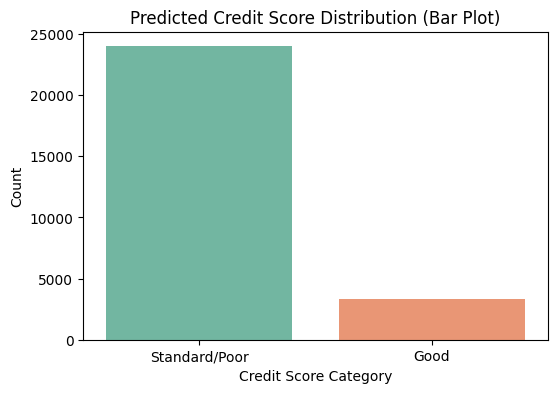

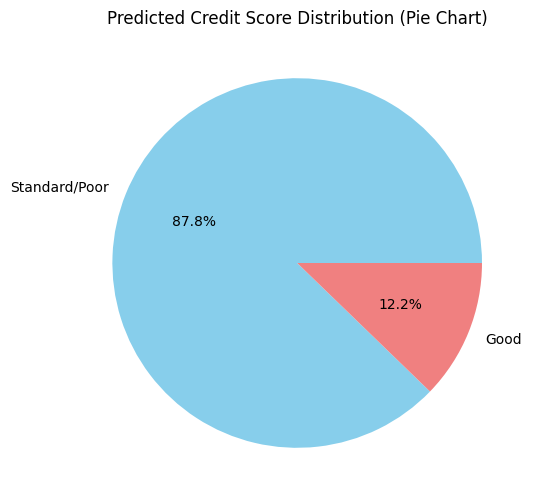

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(data=test_original, x='Predicted_Credit_Score', palette='Set2')
plt.title("Predicted Credit Score Distribution (Bar Plot)")
plt.xlabel("Credit Score Category")
plt.ylabel("Count")
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
test_original['Predicted_Credit_Score'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Predicted Credit Score Distribution (Pie Chart)")
plt.ylabel("")  # Hide y-label
plt.show()
